In [1]:
from community_knapsack import *
from evaluation import evaluation

In [2]:
# The algorithms to use for this evaluation:
exact_algorithms = [
    PBSingleAlgorithm.MEMOIZATION,
    PBSingleAlgorithm.DYNAMIC_PROGRAMMING,
    PBSingleAlgorithm.BRANCH_AND_BOUND,
    PBSingleAlgorithm.ILP_SOLVER
]

approximation_algorithms = [
    PBSingleAlgorithm.GREEDY,
    PBSingleAlgorithm.RATIO_GREEDY,
    PBSingleAlgorithm.FPTAS,
    PBSingleAlgorithm.SIMULATED_ANNEALING,
    PBSingleAlgorithm.GENETIC_ALGORITHM
]

#### This notebook tests the scalability of the algorithms with an increasing minimum cost.
---

In [3]:
# The boundaries of this evaluation:
num_projects = 50
num_voters = 3000
budget = 500_000

start_cost = 5_000
end_cost = 25_000
step_cost = 1_000

max_cost = 50_000

In [4]:
# Set the global x-axis for this evaluation:
x_axis = list(range(start_cost, end_cost + 1, step_cost))

In [5]:
# Generate the problems using the evaluation tools:
problems = evaluation.generate_single_problems(
    num_project_bounds=[(num_projects, num_projects)],
    num_voters_bounds=[(num_voters, num_voters)],
    budget_bounds=[(budget, budget)],
    cost_bounds=[(cost, max_cost) for cost in x_axis]
)

In [6]:
# Obtain the exact results for this evaluation:
exact_results = evaluation.solve_problems(
    problem_list=problems,
    algorithms=exact_algorithms,
    timeout=125,
    max_fail=5,
    file_name='ext-changing-min-cost.json',
    output=True
)

In [7]:
# Obtain the exact results for this evaluation:
approximation_results = evaluation.solve_problems(
    problem_list=problems,
    algorithms=approximation_algorithms,
    timeout=125,
    max_fail=5,
    file_name='apx-changing-min-cost.json',
    output=True
)

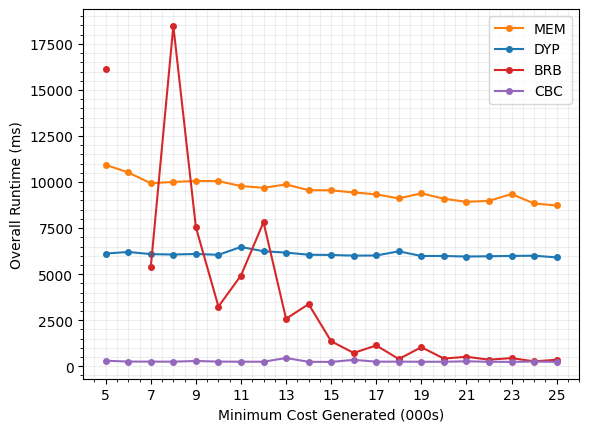

In [8]:
# Plot the exact algorithm runtimes over the problems:
evaluation.plot_2d(
    x_axis=x_axis,
    y_axes=evaluation.get_y_axes(exact_results, exact_algorithms, 2),
    x_label='Minimum Cost Generated (000s)',
    y_label='Overall Runtime (ms)',
    labels=evaluation.get_labels(exact_algorithms),
    colors=evaluation.get_colors(exact_algorithms),
    alphas=evaluation.get_alphas(exact_algorithms),
    sizes=evaluation.get_sizes(exact_algorithms),
    x_tick_limits=(3, 3),
    x_ticks=[x for idx, x in enumerate(x_axis) if idx % 2 == 0],
    x_tick_minor=False
)

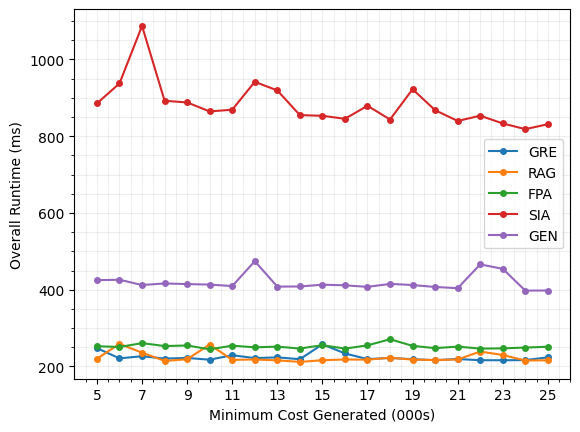

In [29]:
# Plot the exact algorithm runtimes over the problems:
evaluation.plot_2d(
    x_axis=x_axis,
    y_axes=evaluation.get_y_axes(approximation_results, approximation_algorithms, 2),
    x_label='Minimum Cost Generated (000s)',
    y_label='Overall Runtime (ms)',
    labels=evaluation.get_labels(approximation_algorithms),
    colors=evaluation.get_colors(approximation_algorithms),
    alphas=evaluation.get_alphas(approximation_algorithms),
    sizes=evaluation.get_sizes(approximation_algorithms),
    x_tick_limits=(3, 3),
    x_ticks=[x for idx, x in enumerate(x_axis) if idx % 2 == 0],
    x_tick_minor=False
)

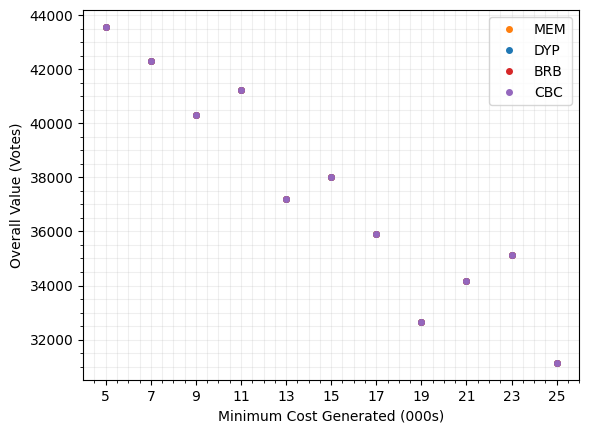

In [10]:
# Plot the approximation vs. exact algorithm values over the problems:
evaluation.plot_2d(
    x_axis=x_axis,
    y_axes=evaluation.get_y_axes(exact_results, exact_algorithms, 0),
    filter_x=2,
    x_label='Minimum Cost Generated (000s)',
    y_label='Overall Value (Votes)',
    marker='o',
    labels=evaluation.get_labels(exact_algorithms),
    colors=evaluation.get_colors(exact_algorithms),
    alphas=evaluation.get_alphas(exact_algorithms),
    sizes=evaluation.get_sizes(exact_algorithms),
    x_tick_limits=(3, 3),
    x_ticks=[x for idx, x in enumerate(x_axis) if idx % 2 == 0],
    x_tick_minor=False
)

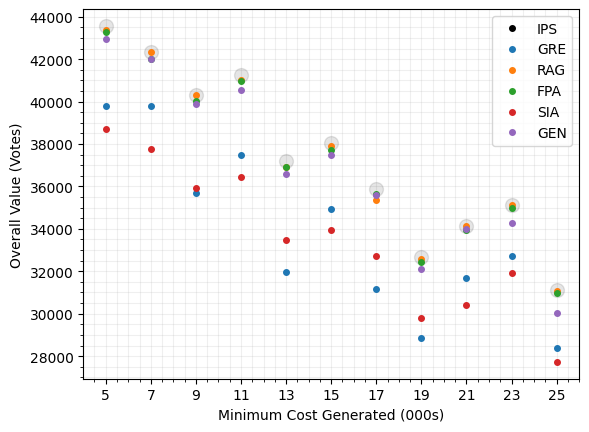

In [9]:
# Plot the approximation vs. exact algorithm values over the problems:
evaluation.plot_2d(
    x_axis=x_axis,
    y_axes=[evaluation.get_y_axis(exact_results, PBSingleAlgorithm.ILP_SOLVER, 0)] + evaluation.get_y_axes(approximation_results, approximation_algorithms, 0),
    filter_x=2,
    x_label='Minimum Cost Generated (000s)',
    y_label='Overall Value (Votes)',
    marker='o',
    labels=['IPS'] + evaluation.get_labels(approximation_algorithms),
    colors=['black'] + evaluation.get_colors(approximation_algorithms),
    alphas=[0.1] + evaluation.get_alphas(approximation_algorithms),
    sizes=[10] + evaluation.get_sizes(approximation_algorithms),
    x_tick_limits=(3, 3),
    x_ticks=[x for idx, x in enumerate(x_axis) if idx % 2 == 0],
    x_tick_minor=False
)

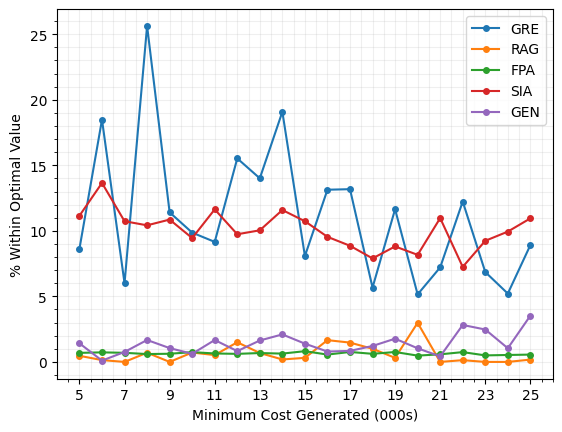

In [32]:
# Plot the approximation % of exact value over the problems:
opt_y = evaluation.get_y_axis(exact_results, PBSingleAlgorithm.ILP_SOLVER, 0)
val_y = evaluation.get_y_axes(approximation_results, approximation_algorithms, 0)

evaluation.plot_2d(
    x_axis=x_axis,
    y_axes=[
        [100 * (1 - (y / opt_y[yid])) for yid, y in enumerate(y_axis)]
        for y_axis in val_y
    ],
    x_label='Minimum Cost Generated (000s)',
    y_label='% Within Optimal Value',
    labels=evaluation.get_labels(approximation_algorithms),
    colors=evaluation.get_colors(approximation_algorithms),
    alphas=evaluation.get_alphas(approximation_algorithms),
    sizes=evaluation.get_sizes(approximation_algorithms),
    x_tick_limits=(3, 3),
    x_ticks=[x for idx, x in enumerate(x_axis) if idx % 2 == 0],
    x_tick_minor=False
)